# Plotting 

**Outline**:

1. Quick overview of plotting with yt
2. Choose your own plotting adventure...

## Plot types in yt

### Spatial Plots: reductions in data spatial dimensionality

![](solutions/figures/intro_figure_00_01_concatenated.png)


2D Spatial plots can be **axis-aligned** or **off-axis** (oriented with an arbitrary plane)

### Spatial Plots for Particles

![](solutions/figures/intro_figure_00_04_concatenated.png)

(SPH off axis support in yt 4.4.0!)

### Plots of statistical distributions

1D & 2D binned statistics with weighting: 

![](solutions/figures/intro_figure_00_02_concatenated.png)


### Volume rendering (more tomorrow...)

![](solutions/figures/intro_figure_00_03_concatenated.png)


## General Usage for Plotting API:

1. generate a plot object with some initital settings
2. optionally use plot **callbacks** to modify that plot
3. call method to display or save 

Two types of callbacks: 

* plot "adjustments" that modify existing plot attributes, method names start with `set_*`
* plot annotations that add new data, method names start with `annotate_*`


yt : [INFO     ] 2025-07-11 15:40:07,862 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2025-07-11 15:40:07,934 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2025-07-11 15:40:07,935 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2025-07-11 15:40:07,936 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-11 15:40:07,936 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-11 15:40:07,937 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|██████████████████| 173/173 [00:00<00:00, 17494.38it/s]
yt : [INFO     ] 2025-07-11 15:40:07,955 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-11 15:40:08,855 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 15:40:08,856 ylim = 0.250026 0.749974
yt : [INFO     ] 2025-07-11 15:40:08,858 xlim = 0.250026 0.749974
yt : [INFO     ] 2025-


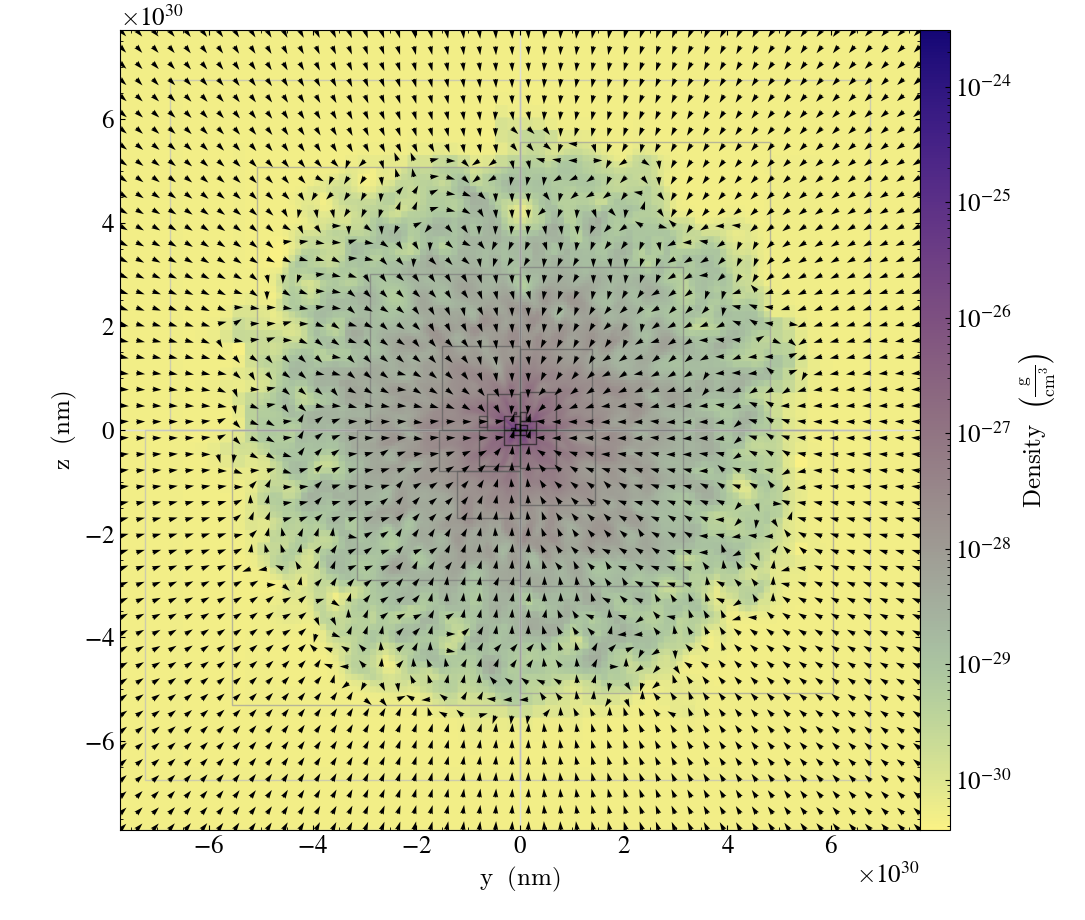

In [20]:
import yt 
ds = yt.load_sample("IsolatedGalaxy")

slc = yt.SlicePlot(ds, 'x', ('gas', 'density'), width=(0.5, 'Mpc')) # create a plot

# some plot adjustments
slc.set_cmap(('gas', 'density'), 'kelp_r')
slc.set_axes_unit('nm')

# some annotations
slc.annotate_grids()
slc.annotate_velocity(normalize=True)

# display the result (don't really have to do this in the notebook cell...)
slc.show()

## Some limitations

Not all plot types and annotations support all datasets and geometries:

**non-cartesian** coordinates: 

* For spatial plots, axis-aligned slicing only
* No volume rendering (will come back to this tomorrow)

Datasets that are not grid-based:

* SPH Data: Volume rendering API not supported, good support for slicing and projections though!
* Unstructured grids: Slicing only

Some plot annotations require certain fields (`annotate_magnetic_field`) or data types (`annotate_mesh_lines` for unstructured grids only)

## Further explorations

Choose your own plotting adventure!